<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/Rice_cooker_Fuzzy_Logic_LongHai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f531a208183b2ba8f9fde9ff91c09aa24a22b5c2e79d63fe3ccd1398c9b69f73
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


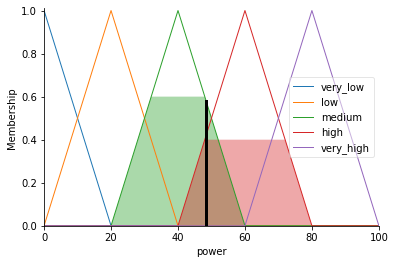

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,2000,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')
time['very_fast'] = fuzz.trimf(time.universe,[10,10,30])
time['fast'] = fuzz.trimf(time.universe,[10,30,60])
time['normal'] = fuzz.trimf(time.universe,[30,60,90])
time['slow'] = fuzz.trimf(time.universe,[60,90,180])
time['very_slow'] = fuzz.trimf(time.universe,[90,90,180])

rice['very_low'] = fuzz.trimf(rice.universe,[100,100,500])
rice['low'] = fuzz.trimf(rice.universe,[100,500,1000])
rice['normal'] = fuzz.trimf(rice.universe,[500,1000,1500])
rice['much'] = fuzz.trimf(rice.universe,[1000,1500,2000])
rice['very_much'] = fuzz.trimf(rice.universe,[1500,1500,2000])

power['very_low'] = fuzz.trimf(power.universe,[0,0,20])
power['low'] = fuzz.trimf(power.universe,[0,20,40])
power['medium'] = fuzz.trimf(power.universe,[20,40,60])
power['high'] = fuzz.trimf(power.universe,[40,60,80])
power['very_high'] = fuzz.trimf(power.universe,[60,80,100])


rule1 = ctrl.Rule(time['very_fast'] & rice['very_low'], power['very_low'])
rule2 = ctrl.Rule(time['fast'] & rice['very_low'], power['low'])
rule3 = ctrl.Rule(time['normal'] & rice['very_low'], power['medium'])
rule4 = ctrl.Rule(time['slow'] & rice['very_low'], power['high'])
rule5 = ctrl.Rule(time['very_slow'] & rice['very_low'], power['very_high'])
rule6 = ctrl.Rule(time['very_fast'] & rice['low'], power['low'])
rule7 = ctrl.Rule(time['fast'] & rice['low'], power['medium'])
rule8 = ctrl.Rule(time['normal'] & rice['low'], power['high'])
rule9 = ctrl.Rule(time['slow'] & rice['low'], power['very_high'])
rule10 = ctrl.Rule(time['very_slow'] & rice['low'], power['very_high'])
rule11 = ctrl.Rule(time['very_fast'] & rice['normal'], power['high'])
rule12 = ctrl.Rule(time['fast'] & rice['normal'], power['high'])
rule13 = ctrl.Rule(time['normal'] & rice['normal'], power['medium'])
rule14 = ctrl.Rule(time['slow'] & rice['normal'], power['low'])
rule15 = ctrl.Rule(time['very_slow'] & rice['normal'], power['very_low'])
rule16 = ctrl.Rule(time['very_fast'] & rice['much'], power['very_high'])
rule17 = ctrl.Rule(time['fast'] & rice['much'], power['very_high'])
rule18 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['medium'])
rule20 = ctrl.Rule(time['very_slow'] & rice['much'], power['low'])
rule21 = ctrl.Rule(time['very_fast'] & rice['very_much'], power['very_high'])
rule22 = ctrl.Rule(time['fast'] & rice['very_much'], power['high'])
rule23 = ctrl.Rule(time['normal'] & rice['very_much'], power['medium'])
rule24 = ctrl.Rule(time['slow'] & rice['very_much'], power['low'])
rule25 = ctrl.Rule(time['very_slow'] & rice['very_much'], power['very_low'])


powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 40
powering.input['rice'] = 700
powering.compute()
power.view(sim = powering)


